# Proyecto de Análisis de Datos

## Importaciones

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
from unidecode import unidecode
import matplotlib.pyplot as plt

In [72]:
from sklearn.decomposition import PCA


ModuleNotFoundError: No module named 'sklearn'

## Lectura

In [3]:
#Lectura de datos
df_init_soil = pd.read_csv('https://raw.githubusercontent.com/LotusZaheer/Soil-data-analysis/main/Data/Resultados_de_An_lisis_de_Laboratorio_Suelos_en_Colombia.csv', low_memory=False)

### Funciones de limpieza

In [4]:
def unique_values_count(df):
    # Obtener los valores únicos para cada columna
    unique_values = df.apply(pd.Series.unique)

    # Crear una lista para almacenar los resultados
    results = []

    # Iterar sobre las columnas y contar los valores únicos
    for columna, valores in unique_values.items():
        num_unique_values = len(valores)
        results.append({'Column Name': columna, 'Unique Values Count': num_unique_values})

    # Crear un DataFrame a partir de la lista de resultados
    results_df = pd.DataFrame(results)

    return results_df

# Función para convertir cadenas de texto a minúsculas sin acentos
def convert_to_lowercase_without_accents(valor):
    if isinstance(valor, str):  # Verificar si el valor es una cadena de texto
        # Convertir a minúsculas y quitar acentos
        return unidecode(valor).lower()
    return valor  # Mantener otros tipos de datos sin cambios

# Función para limitar los números a 6 cifras significativas
def limit_to_six_digits(valor):
    if isinstance(valor, (int, float)):  # Verificar si el valor es numérico
        return round(valor, 6)           # Redondear a 6 cifras significativas
    return valor                         # Mantener otros tipos de datos sin cambios

def limpieza_y_conversion(columna):
    """Función que facilita la limpieza y manejo de 
    columnas numéricas que contienen (, en vez de punto en algunos valores)
    y el signo < haciendo referencia a valores menores a cero"""
    
    columna = columna.str.replace(',', '.')
    columna = columna.apply(lambda x: -float(x.replace('<', '').strip()) if '<' in x else float(x))
    return pd.to_numeric(columna, errors='coerce')



In [5]:
 #Revisión general de los datos
df_init_soil

,numfila,Departamento,Municipio,Cultivo,Estado,Tiempo Establecimiento,Topografia,Drenaje,Riego,Fertilizantes aplicados,...,Hierro (Fe) disponible olsen mg/kg,Cobre (Cu) disponible mg/kg,Manganeso (Mn) disponible Olsen mg/kg,Zinc (Zn) disponible Olsen mg/kg,Boro (B) disponible mg/kg,Hierro (Fe) disponible doble cido mg/kg,Cobre (Cu) disponible doble acido mg/kg,Manganeso (Mn) disponible doble acido mg/kg,Zinc (Zn) disponible doble cido mg/kg,Secuencial
0,NaN,CUNDINAMARCA,FUNZA,Uchuva,POR ESTABLECER,NO APLICA,Ondulado,Bueno,No indica,No indica,...,184.118,"<1,00",2.8760000000000003,3.462,0.1094420600858369,ND,ND,ND,ND,NaN
1,NaN,CUNDINAMARCA,BITUIMA,Citricos,POR ESTABLECER,NO APLICA,Ondulado,Bueno,No cuenta con riego,No indica,...,33.181,3.426,"<1,00",90.92600000000002,0.7103004291845494,ND,ND,ND,ND,NaN
2,NaN,CUNDINAMARCA,VILLAPINZÓN,Pastos-brachiaria,ESTABLECIDO,NO INDICA,Ondulado,Bueno,No cuenta con riego,No indica,...,670.747,3.7199999999999998,8.481,2.455,0.13090128755364808,ND,ND,ND,ND,NaN
3,NaN,CUNDINAMARCA,VILLAPINZÓN,Pastos-brachiaria,ESTABLECIDO,NO INDICA,Ondulado,Bueno,No cuenta con riego,No indica,...,791.175,6.83,5.694,2.6310000000000002,0.30257510729613735,ND,ND,ND,ND,NaN
4,NaN,CUNDINAMARCA,"BOGOTÁ, D.C.",Papa de año,POR ESTABLECER,NO APLICA,Pendiente,Bueno,No cuenta con riego,"15-15-15, 18-18-18 y 10-30-10",...,1685.377,4.124,17.619,8.567,0.30257510729613735,ND,ND,ND,ND,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46740,NaN,TOLIMA,ARMERO GUAYABAL,Neem,ESTABLECIDO,de 1 a 5 años,Plano,Buen drenaje,No indica,No indica,...,22.38,"<1,00","<1,00","<1,00",0.27,ND,ND,ND,ND,NaN
46741,NaN,BOYACÁ,DUITAMA,Hortalizas,POR ESTABLECER,NO APLICA,Plano,Buen drenaje,No indica,No indica,...,58.14,"<1,00",1.79,5.5,0.17,ND,ND,ND,ND,NaN
46742,NaN,CUNDINAMARCA,SASAIMA,Citricos-Limón,POR ESTABLECER,NO APLICA,Ondulado y Pendiente,Buen drenaje,No indica,No indica,...,619.77,8.22,"<1,00",2.04,0.26,ND,ND,ND,ND,NaN
46743,NaN,TOLIMA,HERVEO,Aguacate,No indica,NO INDICA,Pendiente moderada,Buen drenaje,No indica,No indica,...,75.3,1.53,1.42,"<1,00",0.1,ND,ND,ND,ND,NaN


In [6]:
df_init_soil.shape

(46745, 33)

In [7]:
print('Columnas:')
print(df_init_soil.columns)

Columnas:
Index(['numfila', 'Departamento', 'Municipio', 'Cultivo', 'Estado',
       'Tiempo Establecimiento', 'Topografia', 'Drenaje', 'Riego',
       'Fertilizantes aplicados', 'FechaAnalisis', 'pH agua:suelo 2,5:1,0',
       'Materia orgánica (MO) %', 'Fósforo (P) Bray II mg/kg',
       'Azufre (S) Fosfato monocalcico mg/kg', 'Acidez (Al+H) KCL cmol(+)/kg',
       'Aluminio (Al) intercambiable cmol(+)/kg',
       'Calcio (Ca) intercambiable cmol(+)/kg',
       'Magnesio (Mg) intercambiable cmol(+)/kg',
       'Potasio (K) intercambiable cmol(+)/kg',
       'Sodio (Na) intercambiable cmol(+)/kg',
       'capacidad de intercambio cationico (CICE) suma de bases cmol(+)/kg',
       'Conductividad el‚ctrica (CE) relacion 2,5:1,0 dS/m',
       'Hierro (Fe) disponible olsen mg/kg', 'Cobre (Cu) disponible mg/kg',
       'Manganeso (Mn) disponible Olsen mg/kg',
       'Zinc (Zn) disponible Olsen mg/kg', 'Boro (B) disponible mg/kg',
       'Hierro (Fe) disponible doble  cido mg/kg',
       'C

In [8]:
count1 = unique_values_count(df_init_soil)
count1

,Column Name,Unique Values Count
0,numfila,1
1,Departamento,31
2,Municipio,908
3,Cultivo,237
4,Estado,4
5,Tiempo Establecimiento,9
6,Topografia,13
7,Drenaje,9
8,Riego,12
9,Fertilizantes aplicados,987


In [9]:
print(df_init_soil.shape)

(46745, 33)


In [10]:
# Eliminamos las columnas sin información
df_without_nan = df_init_soil.dropna(axis=1, how='all')
print(df_without_nan.shape)

(46745, 30)


In [11]:
# Mostrar los tipos de datos de cada columna
print("Tipos de datos de cada columna:")
print(df_without_nan.dtypes)


Tipos de datos de cada columna:
Departamento                                                           object
Municipio                                                              object
Cultivo                                                                object
Estado                                                                 object
Tiempo Establecimiento                                                 object
Topografia                                                             object
Drenaje                                                                object
Riego                                                                  object
Fertilizantes aplicados                                                object
pH agua:suelo 2,5:1,0                                                  object
Materia orgánica (MO) %                                               float64
Fósforo (P) Bray II mg/kg                                              object
Azufre (S) Fosfato monocalcico m

In [12]:
# Aplicar las funciones a cada elemento del DataFrame
df_in_lower = df_without_nan.applymap(convert_to_lowercase_without_accents)
df_processed = df_in_lower.applymap(limit_to_six_digits)
count2 = unique_values_count(df_processed)
count2

C:\Users\andre\AppData\Local\Temp\ipykernel_17536\1737094359.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_in_lower = df_without_nan.applymap(convert_to_lowercase_without_accents)
C:\Users\andre\AppData\Local\Temp\ipykernel_17536\1737094359.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_processed = df_in_lower.applymap(limit_to_six_digits)


,Column Name,Unique Values Count
0,Departamento,31
1,Municipio,906
2,Cultivo,231
3,Estado,3
4,Tiempo Establecimiento,6
5,Topografia,13
6,Drenaje,9
7,Riego,12
8,Fertilizantes aplicados,940
9,"pH agua:suelo 2,5:1,0",552


In [13]:
merged_df = pd.merge(count1, count2, on='Column Name', suffixes=('_count1', '_count2'))

# Realiza la resta entre las columnas 'Unique Values Count' de count1 y count2
merged_df['Difference'] = merged_df['Unique Values Count_count1'] - merged_df['Unique Values Count_count2']

# Selecciona solo las columnas necesarias en el DataFrame resultante
df_review = merged_df[['Column Name', 'Difference']]
df_review


,Column Name,Difference
0,Departamento,0
1,Municipio,2
2,Cultivo,6
3,Estado,1
4,Tiempo Establecimiento,3
5,Topografia,0
6,Drenaje,0
7,Riego,0
8,Fertilizantes aplicados,47
9,"pH agua:suelo 2,5:1,0",0


In [14]:
valores_unicos = df_processed.apply(pd.Series.unique)
for row, val in valores_unicos.items():
    print(f"Valores unicos en la columna {row}")
    print(val)
    print('------------------------------------')
# df_processed.to_csv('df_processed.csv', index=False)

Valores unicos en la columna Departamento
['cundinamarca' 'huila' 'meta' 'boyaca' 'tolima' 'antioquia' 'quindio'
 'casanare' 'arauca' 'atlantico' 'santander' 'valle del cauca'
 'la guajira' 'cesar' 'caldas' 'magdalena' 'norte de santander' 'bolivar'
 'guaviare' 'cauca' 'cordoba' 'vichada' 'narino' 'caqueta' 'risaralda'
 'putumayo' 'sucre' 'choco' 'guainia' 'amazonas' 'bogota, d.c.']
------------------------------------
Valores unicos en la columna Municipio
['funza' 'bituima' 'villapinzon' 'bogota,  d.c.' 'gigante' 'acacias'
 'tuta' 'murillo' 'la vega' 'villeta' 'el santuario' 'garagoa' 'chia'
 'circasia' 'sacama' 'chita' 'socota' 'tame' 'recetor' 'san martin'
 'maripi' 'nocaima' 'yopal' 'duitama' 'palmar de varela' 'puerto lopez'
 'cachipay' 'puerto wilches' 'charala' 'guaduas' 'carmen de carupa' 'une'
 'lenguazaque' 'san cayetano' 'cogua' 'choconta' 'necocli' 'la calera'
 'villa de san diego de ubate' 'rionegro' 'ginebra' 'maicao'
 'la jagua de ibirico' 'tenjo' 'samana' 'tausa' 'care

In [15]:
data_processed = df_processed.copy()
print(data_processed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46745 entries, 0 to 46744
Data columns (total 30 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Departamento                                                        46745 non-null  object 
 1   Municipio                                                           46745 non-null  object 
 2   Cultivo                                                             46745 non-null  object 
 3   Estado                                                              46745 non-null  object 
 4   Tiempo Establecimiento                                              46745 non-null  object 
 5   Topografia                                                          46745 non-null  object 
 6   Drenaje                                                             46745 non-null  object 
 7   Riego        

In [16]:
# Visualización de columnas numéricas
valores = data_processed.iloc[:, 9:]
valores

,"pH agua:suelo 2,5:1,0",Materia orgánica (MO) %,Fósforo (P) Bray II mg/kg,Azufre (S) Fosfato monocalcico mg/kg,Acidez (Al+H) KCL cmol(+)/kg,Aluminio (Al) intercambiable cmol(+)/kg,Calcio (Ca) intercambiable cmol(+)/kg,Magnesio (Mg) intercambiable cmol(+)/kg,Potasio (K) intercambiable cmol(+)/kg,Sodio (Na) intercambiable cmol(+)/kg,...,"Conductividad el‚ctrica (CE) relacion 2,5:1,0 dS/m",Hierro (Fe) disponible olsen mg/kg,Cobre (Cu) disponible mg/kg,Manganeso (Mn) disponible Olsen mg/kg,Zinc (Zn) disponible Olsen mg/kg,Boro (B) disponible mg/kg,Hierro (Fe) disponible doble cido mg/kg,Cobre (Cu) disponible doble acido mg/kg,Manganeso (Mn) disponible doble acido mg/kg,Zinc (Zn) disponible doble cido mg/kg
0,5.66,9.706679,5.622298591549295,4.345549738219895,nd,nd,4.96569191,0.9788292099999999,0.20453417999999998,0.14592724999999998,...,0.22351319999999997,184.118,"<1,00",2.8760000000000003,3.462,0.1094420600858369,nd,nd,nd,nd
1,8.08,3.417595,7.570467605633801,6.832460732984293,nd,nd,42.704796720000004,1.27535635,0.13121697599999999,0.12028233,...,0.6927323999999999,33.181,3.426,"<1,00",90.92600000000002,0.7103004291845494,nd,nd,nd,nd
2,5.87,2.336659,16.901171830985913,14.424083769633508,nd,nd,9.59718306,0.9457007199999999,0.194180868,0.13846343,...,0.3344772,670.747,3.7199999999999998,8.481,2.455,0.13090128755364808,nd,nd,nd,nd
3,5.56,6.853757,32.07638309859154,9.581151832460733,nd,nd,7.528300300000001,0.8416084699999999,1.5904150199999998,"<0,14",...,0.3614256,791.175,6.83,5.694,2.6310000000000002,0.30257510729613735,nd,nd,nd,nd
4,4.87,16.041251,64.19919999999999,5.523560209424084,5.028453938178679,4.643149930128704,2.23477545,0.34667245,0.31318768799999996,0.15635745999999998,...,0.3741072,1685.377,4.124,17.619,8.567,0.30257510729613735,nd,nd,nd,nd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46740,6.81,1.090000,68.6,5.94,nd,nd,13.7,3.7,0.7,0.23,...,0.24,22.38,"<1,00","<1,00","<1,00",0.27,nd,nd,nd,nd
46741,7.16,0.960000,43.82,15.46,nd,nd,18.37,0.3,"<0,09",0.15,...,0.92,58.14,"<1,00",1.79,5.5,0.17,nd,nd,nd,nd
46742,4.19,4.610000,24.13,10.11,9.14,8.29,"<0,59","<0,20",0.17,"<0,14",...,0.24,619.77,8.22,"<1,00",2.04,0.26,nd,nd,nd,nd
46743,5.73,6.410000,5.34,10.25,nd,nd,2.29,0.42,0.12,"<0,14",...,0.11,75.3,1.53,1.42,"<1,00",0.1,nd,nd,nd,nd


### Limpieza de columnas numéricas


In [17]:
# Corregir las columnas con valores extraños para poder convertir a float
columns_to_numeric = valores.columns.tolist()


### Se convierten las columnas a los tipos de datos pertinentes

- Se pierden algunas filas en la conversión debido a valores con símbolos como < o valores nulos en todas las columnas.
- Se agrega el ID.

In [18]:
data_processed = data_processed.astype(str).assign(**{col: pd.to_numeric(data_processed[col], errors='coerce') for col in columns_to_numeric})
data_processed

,Departamento,Municipio,Cultivo,Estado,Tiempo Establecimiento,Topografia,Drenaje,Riego,Fertilizantes aplicados,"pH agua:suelo 2,5:1,0",...,"Conductividad el‚ctrica (CE) relacion 2,5:1,0 dS/m",Hierro (Fe) disponible olsen mg/kg,Cobre (Cu) disponible mg/kg,Manganeso (Mn) disponible Olsen mg/kg,Zinc (Zn) disponible Olsen mg/kg,Boro (B) disponible mg/kg,Hierro (Fe) disponible doble cido mg/kg,Cobre (Cu) disponible doble acido mg/kg,Manganeso (Mn) disponible doble acido mg/kg,Zinc (Zn) disponible doble cido mg/kg
0,cundinamarca,funza,uchuva,por establecer,no aplica,ondulado,bueno,no indica,no indica,5.66,...,0.223513,184.118,NaN,2.876,3.462,0.109442,NaN,NaN,NaN,NaN
1,cundinamarca,bituima,citricos,por establecer,no aplica,ondulado,bueno,no cuenta con riego,no indica,8.08,...,0.692732,33.181,3.426,NaN,90.926,0.710300,NaN,NaN,NaN,NaN
2,cundinamarca,villapinzon,pastos-brachiaria,establecido,no indica,ondulado,bueno,no cuenta con riego,no indica,5.87,...,0.334477,670.747,3.720,8.481,2.455,0.130901,NaN,NaN,NaN,NaN
3,cundinamarca,villapinzon,pastos-brachiaria,establecido,no indica,ondulado,bueno,no cuenta con riego,no indica,5.56,...,0.361426,791.175,6.830,5.694,2.631,0.302575,NaN,NaN,NaN,NaN
4,cundinamarca,"bogota, d.c.",papa de ano,por establecer,no aplica,pendiente,bueno,no cuenta con riego,"15-15-15, 18-18-18 y 10-30-10",4.87,...,0.374107,1685.377,4.124,17.619,8.567,0.302575,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46740,tolima,armero guayabal,neem,establecido,de 1 a 5 anos,plano,buen drenaje,no indica,no indica,6.81,...,0.240000,22.380,NaN,NaN,NaN,0.270000,NaN,NaN,NaN,NaN
46741,boyaca,duitama,hortalizas,por establecer,no aplica,plano,buen drenaje,no indica,no indica,7.16,...,0.920000,58.140,NaN,1.790,5.500,0.170000,NaN,NaN,NaN,NaN
46742,cundinamarca,sasaima,citricos-limon,por establecer,no aplica,ondulado y pendiente,buen drenaje,no indica,no indica,4.19,...,0.240000,619.770,8.220,NaN,2.040,0.260000,NaN,NaN,NaN,NaN
46743,tolima,herveo,aguacate,no indica,no indica,pendiente moderada,buen drenaje,no indica,no indica,5.73,...,0.110000,75.300,1.530,1.420,NaN,0.100000,NaN,NaN,NaN,NaN


# Exploración de datos y análisis


## Análisis por Ubicación Geográfica y Tipo de Cultivo

### Se filtran los datos por departamento y municipio

* Se calcula el top 30 por cultivos en Cundinamarca, Boyacá y Bogotá.
* De igual modo, el top 10 por cultivos en cada uno de los departamentos seleccionados: Cundinamarca, Boyacá y Bogotá.


In [19]:
departamentos = ['cundinamarca', 'boyaca', 'bogota, d.c.']
datos_filtrados = data_processed[data_processed['Departamento'].isin(departamentos)]


cultivo_ubicaicon = datos_filtrados.groupby(['Departamento', 'Municipio','Cultivo'])['Cultivo'].count().reset_index(name='Count')
cultivo_ubicaicon.sort_values(by=['Count', 'Departamento'], ascending=[False, False], inplace=True)
top_30_cultivos = cultivo_ubicaicon.head(30)
top_30_cultivos

,Departamento,Municipio,Cultivo,Count
1626,cundinamarca,yacopi,cacao,328
1041,cundinamarca,la palma,cacao,181
249,boyaca,puerto boyaca,cacao,120
1183,cundinamarca,nocaima,cana panelera/azucar,116
606,cundinamarca,"bogota, d.c.",platano,111
982,cundinamarca,guatavita,pastos,104
1605,cundinamarca,villeta,cana panelera/azucar,98
782,cundinamarca,el colegio,cafe,96
1485,cundinamarca,tibacuy,cafe,96
972,cundinamarca,guasca,pastos,93


### Cultivos más comunes

In [20]:
cultivos_mas_comunes = datos_filtrados.groupby('Cultivo')['Cultivo'].count().reset_index(name='Count')
cultivos_mas_comunes = cultivos_mas_comunes.sort_values(by='Count', ascending=False).head(10)
cultivos_mas_comunes 

,Cultivo,Count
118,pastos,1973
34,cafe,1231
32,cacao,1170
38,cana panelera/azucar,1123
4,aguacate,679
115,papa de ano,651
111,no indica,553
144,uchuva,315
129,pastos-raigras,267
103,mango,241


### Cultivos más comunes en Cundinamarca

In [21]:
conteo_departamento = datos_filtrados.groupby('Departamento')['Cultivo'].count().reset_index(name='Count')
conteo_departamento

,Departamento,Count
0,"bogota, d.c.",16
1,boyaca,2905
2,cundinamarca,9169


In [22]:
cultivos_mas_comunes_cundinamarca1 = datos_filtrados[datos_filtrados['Departamento'].isin(['cundinamarca']) & ~datos_filtrados['Municipio'].isin(['bogota, d.c.'])]

cultivos_mas_comunes_cundinamarca = cultivos_mas_comunes_cundinamarca1.groupby(['Cultivo'])['Cultivo'].count().reset_index(name='Count')
cultivos_mas_comunes_cundinamarca = cultivos_mas_comunes_cundinamarca.sort_values(by='Count', ascending=False).head(10)
print(f'Cultivos mas comunes en cundinamarca \n*','--'*20,'\n',cultivos_mas_comunes_cundinamarca)

Cultivos mas comunes en cundinamarca 
* ---------------------------------------- 
                   Cultivo  Count
114                pastos   1286
33                   cafe   1141
31                  cacao    982
37   cana panelera/azucar    879
4                aguacate    574
111           papa de ano    481
100                 mango    241
129               platano    224
80                 frijol    200
99                   maiz    196


### Cultivos más comunes en Bogotá

In [23]:
prueba = cultivos_mas_comunes_cundinamarca1.groupby(['Cultivo'])['Cultivo'].count().reset_index(name='Count')
prueba = prueba.sort_values(by='Count', ascending=False).head(10)
prueba

,Cultivo,Count
114,pastos,1286
33,cafe,1141
31,cacao,982
37,cana panelera/azucar,879
4,aguacate,574
111,papa de ano,481
100,mango,241
129,platano,224
80,frijol,200
99,maiz,196


In [24]:
cultivos_mas_comunes_bogota = datos_filtrados[datos_filtrados['Departamento'].isin(['bogota, d.c.']) | datos_filtrados['Municipio'].isin(['bogota,  d.c.'])]
cultivos_mas_comunes_bogota = cultivos_mas_comunes_bogota.groupby(['Cultivo'])['Cultivo'].count().reset_index(name='Count')
cultivos_mas_comunes_bogota = cultivos_mas_comunes_bogota.sort_values(by='Count', ascending=False).head(10)
print(f'Cultivos mas comunes en Bogota \n*','--'*20,'\n',cultivos_mas_comunes_bogota)

Cultivos mas comunes en Bogota 
* ---------------------------------------- 
             Cultivo  Count
41          platano    111
28       hortalizas     82
37           pastos     70
38  pastos-estrella     34
6            arveja     27
47             yuca     24
36      papa de ano     24
21         forestal     23
9             cacao     23
30             maiz     22


In [25]:
cultivos_mas_comunes_boyaca = datos_filtrados[datos_filtrados['Departamento'].isin(['boyaca'])]
cultivos_mas_comunes_boyaca = cultivos_mas_comunes_boyaca.groupby(['Cultivo'])['Cultivo'].count().reset_index(name='Count')
cultivos_mas_comunes_boyaca = cultivos_mas_comunes_boyaca.sort_values(by='Count', ascending=False).head(10)
print(f'Cultivos mas comunes en Boyaca \n*','--'*20,'\n',cultivos_mas_comunes_boyaca)


Cultivos mas comunes en Boyaca 
* ---------------------------------------- 
                  Cultivo  Count
51                pastos    684
47             no indica    372
13  cana panelera/azucar    244
65                uchuva    192
10                 cacao    187
49           papa de ano    170
55        pastos-raigras    124
0               aguacate    105
38                gulupa     96
12                  cafe     87


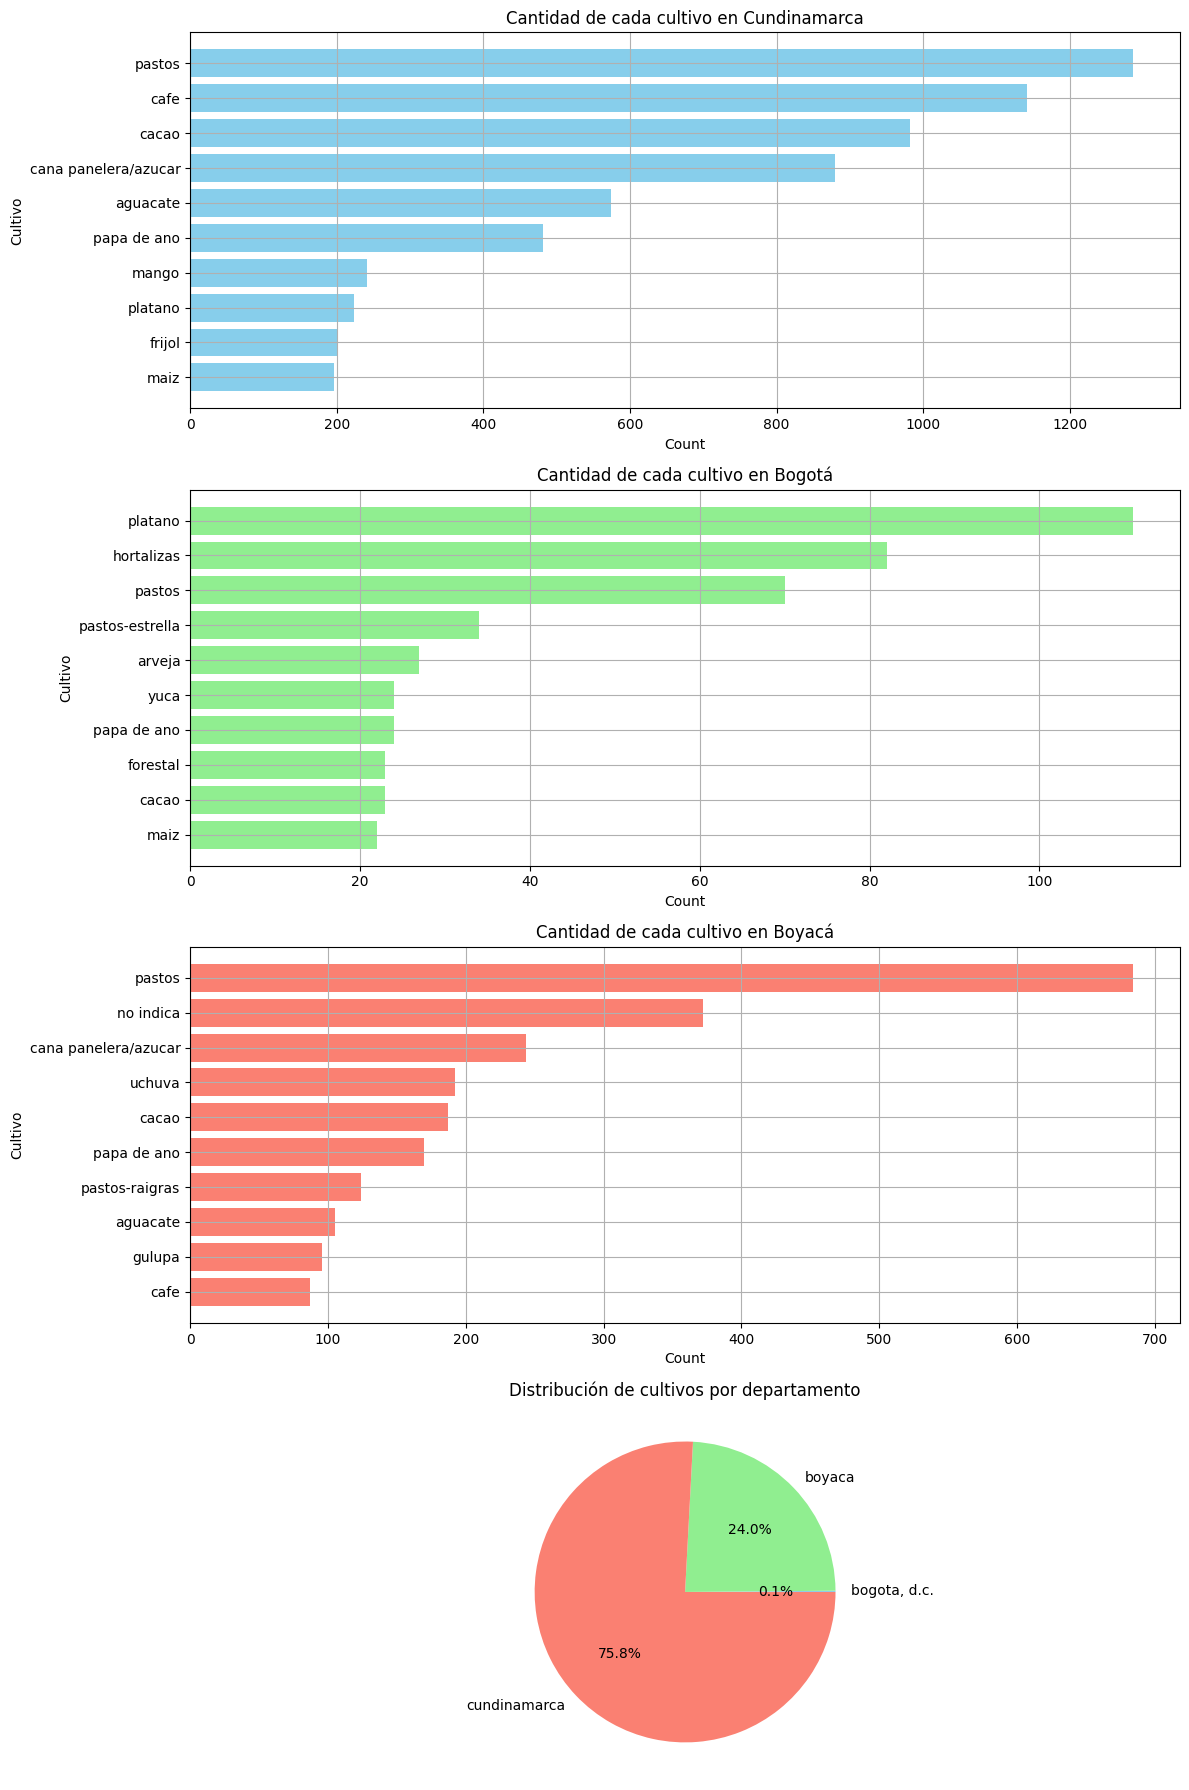

In [26]:
fig, axs = plt.subplots(4, 1, figsize=(12, 18))

# Gráfico de barras para Cundinamarca
axs[0].barh(cultivos_mas_comunes_cundinamarca['Cultivo'], cultivos_mas_comunes_cundinamarca['Count'], color='skyblue')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Cultivo')
axs[0].set_title('Cantidad de cada cultivo en Cundinamarca')
axs[0].invert_yaxis()  # Invertir el eje y para que el cultivo con mayor count esté arriba
axs[0].grid(True)

# Gráfico de barras para Bogotá
axs[1].barh(cultivos_mas_comunes_bogota['Cultivo'], cultivos_mas_comunes_bogota['Count'], color='lightgreen')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Cultivo')
axs[1].set_title('Cantidad de cada cultivo en Bogotá')
axs[1].invert_yaxis()
axs[1].grid(True)

# Gráfico de barras para Boyacá
axs[2].barh(cultivos_mas_comunes_boyaca['Cultivo'], cultivos_mas_comunes_boyaca['Count'], color='salmon')
axs[2].set_xlabel('Count')
axs[2].set_ylabel('Cultivo')
axs[2].set_title('Cantidad de cada cultivo en Boyacá')
axs[2].invert_yaxis()
axs[2].grid(True)

# Gráfico de pastel para el conteo de departamentos
axs[3].pie(conteo_departamento['Count'], labels=conteo_departamento['Departamento'], autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'])
axs[3].set_title('Distribución de cultivos por departamento')

# Ajustar el layout para evitar superposición
plt.tight_layout()

# Mostrar la figura con los cuatro gráficos
plt.show()

# Seleccción final de datos

In [54]:

datos_filtrados = datos_filtrados[datos_filtrados['Drenaje'] != 'error: #n/a']
datos_filtrados = datos_filtrados[datos_filtrados['Cultivo'] != 'no indica']
datos_filtrados['Drenaje'] = datos_filtrados['Drenaje'].replace({'no indica': 0, 'malo': 1, 'mal drenaje': 1, 'regular': 2, 'regular drenaje': 2, 'bueno': 3, 'buen drenaje': 3})

In [55]:
"""

# Otras variables
'Drenaje',
'pH agua:suelo 2,5:1,0',
'capacidad de intercambio cationico (CICE) suma de bases cmol(+)/kg',
'Conductividad el‚ctrica (CE) relacion 2,5:1,0 dS/m',

#Nutrientes Micro nutrientes
'Azufre (S) Fosfato monocalcico mg/kg', 
'Boro (B) disponible mg/kg',
'Cobre (Cu) disponible mg/kg',
'Manganeso (Mn) disponible Olsen mg/kg',
'Hierro (Fe) disponible olsen mg/kg', 
'Zinc (Zn) disponible Olsen mg/kg', 

# Macro nutrientes
'Fósforo (P) Bray II mg/kg',
'Potasio (K) intercambiable cmol(+)/kg',
'Calcio (Ca) intercambiable cmol(+)/kg',
'Magnesio (Mg) intercambiable cmol(+)/kg',

# Otros Nutrientes
'Aluminio (Al) intercambiable cmol(+)/kg',
'Sodio (Na) intercambiable cmol(+)/kg',

# A predecir
'Cultivo',

"""

"\n\n# Otras variables\n'Drenaje',\n'pH agua:suelo 2,5:1,0',\n'capacidad de intercambio cationico (CICE) suma de bases cmol(+)/kg',\n'Conductividad el‚ctrica (CE) relacion 2,5:1,0 dS/m',\n\n#Nutrientes Micro nutrientes\n'Azufre (S) Fosfato monocalcico mg/kg', \n'Boro (B) disponible mg/kg',\n'Cobre (Cu) disponible mg/kg',\n'Manganeso (Mn) disponible Olsen mg/kg',\n'Hierro (Fe) disponible olsen mg/kg', \n'Zinc (Zn) disponible Olsen mg/kg', \n\n# Macro nutrientes\n'Fósforo (P) Bray II mg/kg',\n'Potasio (K) intercambiable cmol(+)/kg',\n'Calcio (Ca) intercambiable cmol(+)/kg',\n'Magnesio (Mg) intercambiable cmol(+)/kg',\n\n# Otros Nutrientes\n'Aluminio (Al) intercambiable cmol(+)/kg',\n'Sodio (Na) intercambiable cmol(+)/kg',\n\n# A predecir\n'Cultivo',\n\n"

In [64]:
datos_filtrados = datos_filtrados.rename(columns={
    'Drenaje': 'Drenaje',
       'pH agua:suelo 2,5:1,0': "PH",
       'capacidad de intercambio cationico (CICE) suma de bases cmol(+)/kg': 'CICE',
       'Conductividad el‚ctrica (CE) relacion 2,5:1,0 dS/m': 'CE',
       'Azufre (S) Fosfato monocalcico mg/kg': 'Azufre',
       'Boro (B) disponible mg/kg': 'Boro',
       'Cobre (Cu) disponible mg/kg': 'Cobre',
       'Manganeso (Mn) disponible Olsen mg/kg': 'Manganeso',
       'Hierro (Fe) disponible olsen mg/kg': 'Hierro',
       'Zinc (Zn) disponible Olsen mg/kg': 'Zinc',
       'Fósforo (P) Bray II mg/kg': 'Fosforo',
       'Potasio (K) intercambiable cmol(+)/kg': 'Potasio',
       'Calcio (Ca) intercambiable cmol(+)/kg': 'Calcio',
       'Magnesio (Mg) intercambiable cmol(+)/kg': 'Magnesio',
       # 'Aluminio (Al) intercambiable cmol(+)/kg': 'Aluminio', #demasiados NaN
       # 'Sodio (Na) intercambiable cmol(+)/kg': 'Sodio', #demasiados NaN
       'Cultivo': 'Cultivo',
})

In [65]:
datos_modelo = datos_filtrados[['Drenaje',
       "PH",
       'CICE',
       'CE',
       'Azufre',
       'Boro',
       'Cobre',
       'Manganeso',
       'Hierro',
       'Zinc',
       'Fosforo',
        'Potasio',
       'Calcio',
       'Magnesio',
       # 'Aluminio', #demasiados NaN
        # 'Sodio', #demasiados NaN
       'Cultivo']]

In [66]:
# Se determino poner los valores NaN y Null como 0
datos_modelo = datos_modelo.fillna(0)

# Revisamos la cantidad de valores nulos
cantidad_nan = datos_modelo.isna().sum()
porcentaje_nan = datos_modelo.isna().mean() * 100
resultado = pd.DataFrame({
    'Valores NaN': cantidad_nan,
    'Porcentaje NaN (%)': porcentaje_nan
})

print(resultado)

           Valores NaN  Porcentaje NaN (%)
Drenaje              0                 0.0
PH                   0                 0.0
CICE                 0                 0.0
CE                   0                 0.0
Azufre               0                 0.0
Boro                 0                 0.0
Cobre                0                 0.0
Manganeso            0                 0.0
Hierro               0                 0.0
Zinc                 0                 0.0
Fosforo              0                 0.0
Potasio              0                 0.0
Calcio               0                 0.0
Magnesio             0                 0.0
Cultivo              0                 0.0


In [67]:
datos_modelo['Cultivo'].value_counts()

Cultivo
pastos                            1972
cafe                              1231
cacao                             1170
cana panelera/azucar              1123
aguacate                           679
                                  ... 
huerta                               1
morera                               1
pastos-elefante                      1
flores ornamentales-hortencias       1
cilantro                             1
Name: count, Length: 147, dtype: int64

In [68]:
datos_modelo

,Drenaje,PH,CICE,CE,Azufre,Boro,Cobre,Manganeso,Hierro,Zinc,Fosforo,Potasio,Calcio,Magnesio,Cultivo
0,3,5.66,6.294983,0.223513,4.345550,0.109442,0.000,2.876,184.118,3.462,5.622299,0.204534,4.965692,0.978829,uchuva
1,3,8.08,44.231652,0.692732,6.832461,0.710300,3.426,0.000,33.181,90.926,7.570468,0.131217,42.704797,1.275356,citricos
2,3,5.87,10.875528,0.334477,14.424084,0.130901,3.720,8.481,670.747,2.455,16.901172,0.194181,9.597183,0.945701,pastos-brachiaria
3,3,5.56,10.060324,0.361426,9.581152,0.302575,6.830,5.694,791.175,2.631,32.076383,1.590415,7.528300,0.841608,pastos-brachiaria
4,3,4.87,8.079447,0.374107,5.523560,0.302575,4.124,17.619,1685.377,8.567,64.199200,0.313188,2.234775,0.346672,papa de ano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46737,3,7.28,39.370000,1.630000,55.610000,0.060000,5.130,0.000,15.400,16.260,87.270000,0.300000,37.350000,1.380000,uva
46738,3,7.34,40.040000,2.650000,97.030000,0.290000,4.560,0.000,13.890,17.550,73.260000,0.300000,38.120000,1.300000,uva
46739,3,5.28,11.850000,1.630000,42.230000,0.420000,1.690,6.120,179.840,5.430,84.040000,2.430000,5.980000,1.160000,uchuva
46741,3,7.16,18.900000,0.920000,15.460000,0.170000,0.000,1.790,58.140,5.500,43.820000,0.000000,18.370000,0.300000,hortalizas


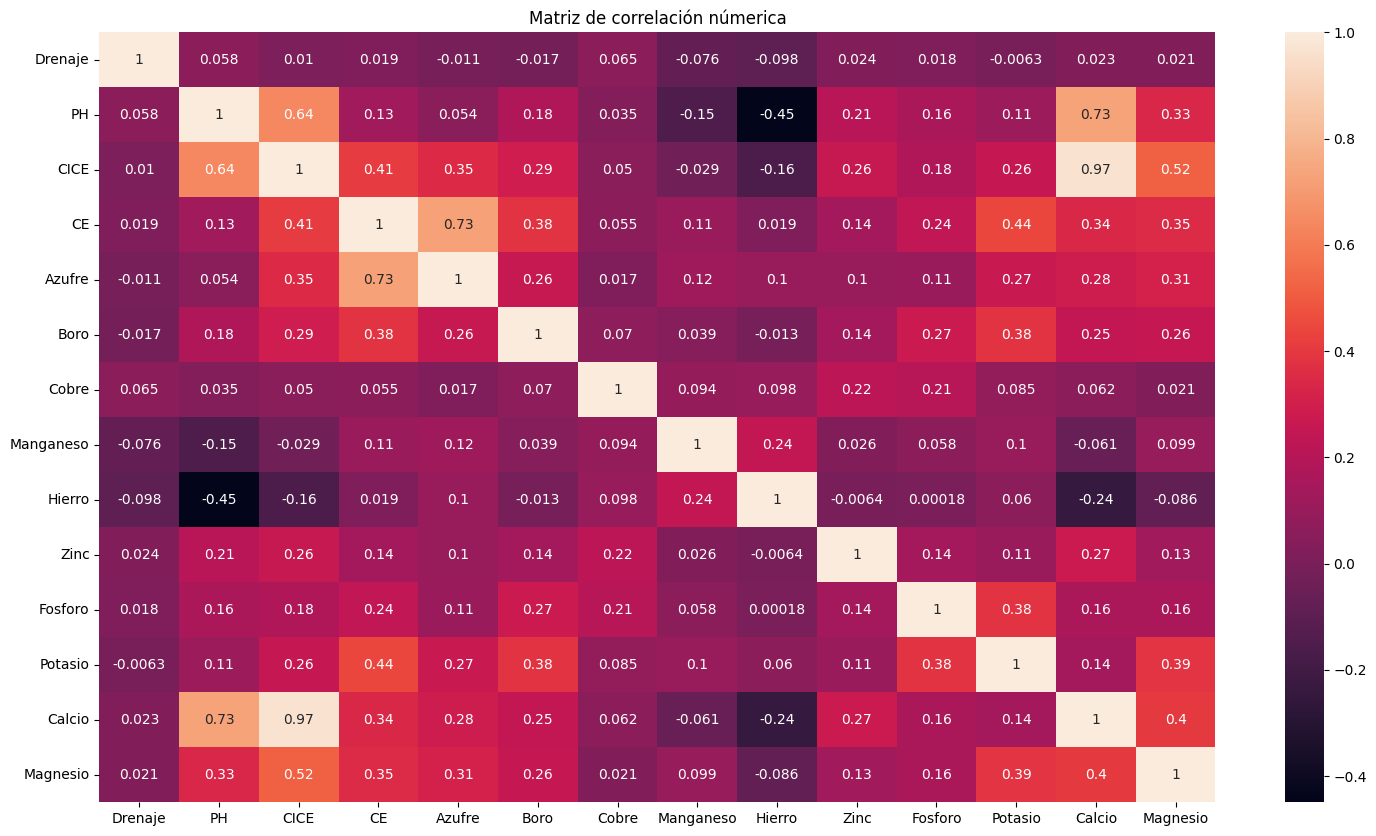

In [71]:
# Matriz de correlación
# Visualizing correlation matrix of numeric features
numeric_data = datos_modelo.select_dtypes(include=[float, int])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(18,10))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Matriz de correlación númerica')
plt.show()

# Modelo

# Análisis de salud del suelo por top 10 cultivos teniendo en cuenta la relación entre:



* pH agua:suelo 2,5:1,0 
* Materia orgánica (MO) %
* Capacidad de intercambio catiónico (CICE) suma de bases cmol(+)/kg

In [70]:
valores = ['Municipio','Cultivo','pH agua:suelo 2,5:1,0', 'Materia orgánica (MO) %', 'capacidad de intercambio cationico (CICE) suma de bases cmol(+)/kg']
salud_del_suelo_cun = datos_filtrados[datos_filtrados['Departamento'].isin(['cundinamarca'])]
salud_del_suelo_cun = salud_del_suelo_cun.loc[:, valores]
salud_del_suelo_cun = salud_del_suelo_cun.groupby(['Cultivo'])[valores[2:]].mean()
salud_del_suelo_cun['count'] = cultivos_mas_comunes_cundinamarca1.groupby(['Cultivo']).size()
# salud_del_suelo_cun = salud_del_suelo_cun.sort_values(by=valores[2:], ascending=True)
salud_del_suelo_cun = salud_del_suelo_cun.sort_values(by='count', ascending=False).reset_index()
salud_del_suelo_cun_10 = salud_del_suelo_cun.head(10)
salud_del_suelo_cun

KeyError: "['pH agua:suelo 2,5:1,0', 'capacidad de intercambio cationico (CICE) suma de bases cmol(+)/kg'] not in index"

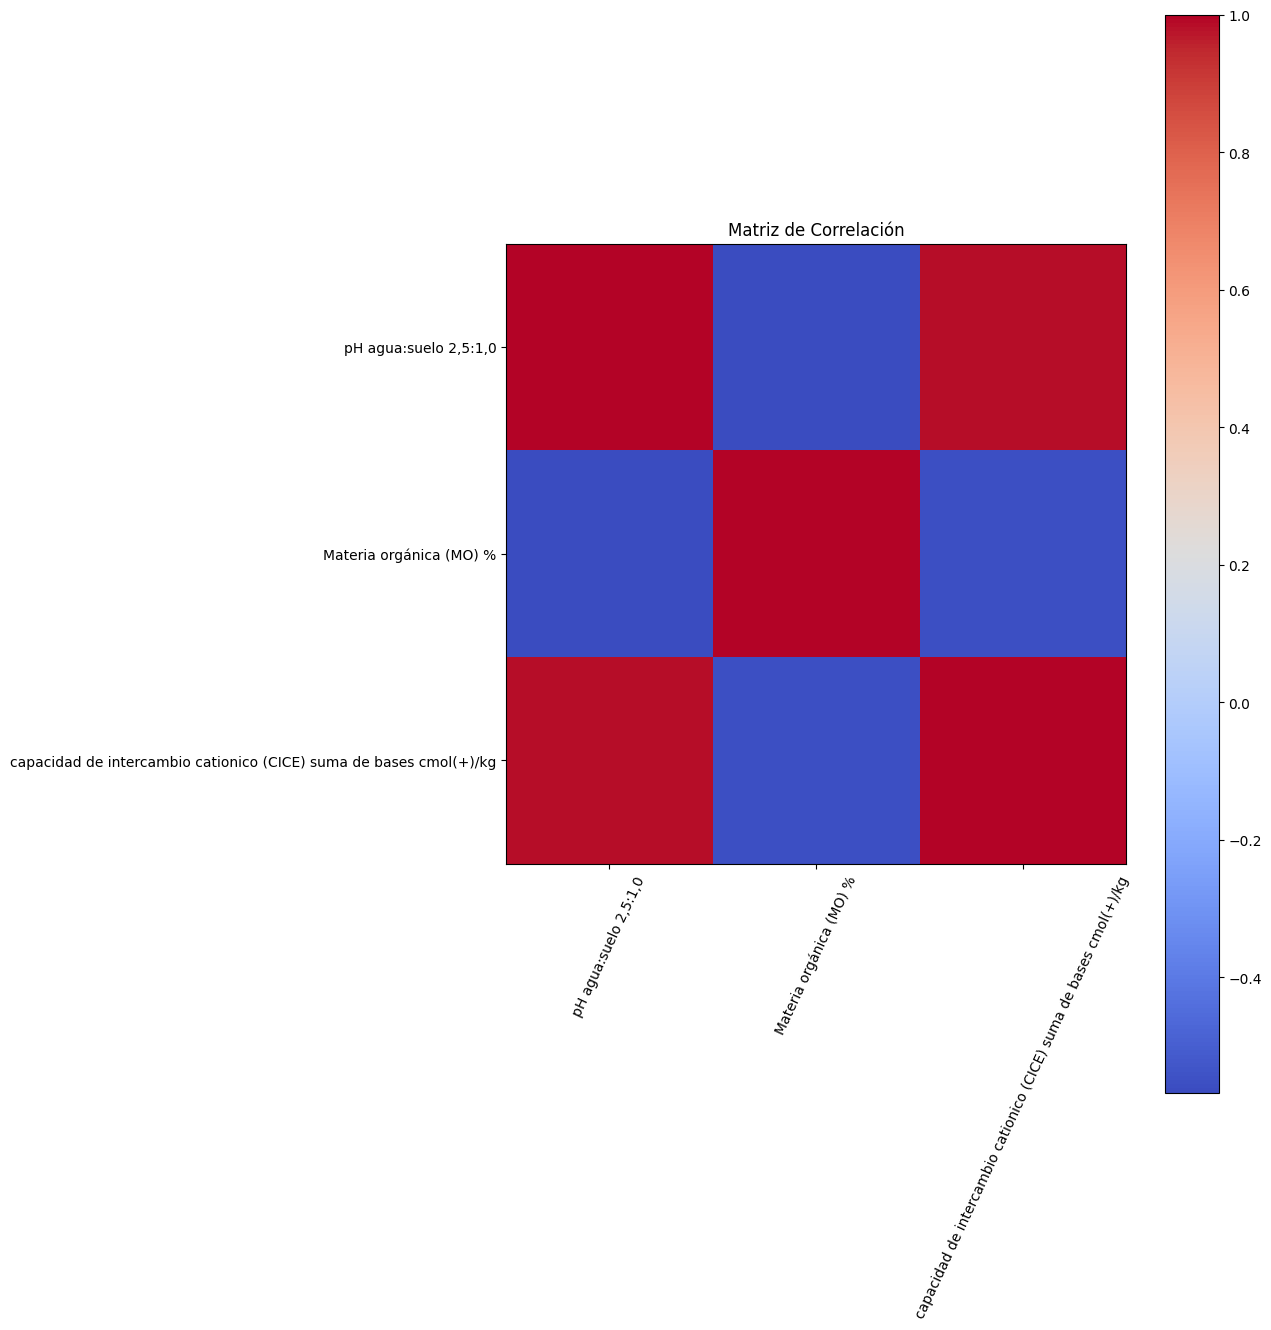

In [ ]:
correlacion =  salud_del_suelo_cun_10.drop(columns=['Cultivo', 'count'])
correlacion = correlacion.corr()

plt.figure(figsize=(10, 14))
plt.imshow(correlacion, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Matriz de Correlación')
plt.xticks(range(len(correlacion.columns)), correlacion.columns, rotation=65)
plt.yticks(range(len(correlacion)), correlacion.columns)
plt.show()

In [ ]:
salud_del_suelo_cun.describe()

,"pH agua:suelo 2,5:1,0",Materia orgánica (MO) %,capacidad de intercambio cationico (CICE) suma de bases cmol(+)/kg,count
count,143.000000,143.000000,143.000000,143.000000
mean,5.804686,6.922391,13.812438,64.118881
std,0.714557,3.842554,10.074906,190.036857
min,4.360000,1.129582,1.020000,1.000000
25%,5.358333,3.873900,8.558650,2.000000
50%,5.648462,6.251580,11.638823,5.000000
75%,6.062500,9.501113,15.919850,35.500000
max,8.430000,19.999485,89.578795,1286.000000
